# <center>Data Mining Project Code</center>

** **
## <center>*03 - Cuisine Preference Clustering*</center>

** **

In this notebook, we aim to understand customer behaviors and preferences by clustering them based on their culinary orders. By segmenting customers according to the types of cuisines they frequently order, we can uncover patterns in their consumption habits. This information will allow businesses to tailor marketing strategies, optimize inventory, and offer personalized recommendations, ultimately enhancing the customer experience.

The primary goal of this notebook is to apply unsupervised learning techniques to identify distinct customer groups based on their preference for different cuisines. We will utilize clustering algorithms such as KMeans, Hierarchical Clustering, SOM and Density-Based Algorithms to form these groups, and evaluate the clustering quality using various metrics like R², Silhouette Score, and Calinski-Harabasz Index.

At the end, we will compare our best solutions and explore the best one, creating customer profiles for each segment and interpreting their characteristics. By doing so, we aim to provide actionable insights for businesses to enhance customer satisfaction and improve operational efficiencies.


The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

1. [Clustering](#2.-Clustering) <br><br>


# 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display 

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Clustering algorithms
from sklearn.cluster import AgglomerativeClustering, KMeans

# Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

# Segmentation
import segmentation as s

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Others
import functions as f

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

path = './plots/cuisine/'

In [2]:
data = pd.read_csv('data/preprocessed_data.csv', 
                   index_col = "customer_id")
cui_data = data[s.cuisine_preferences]
cui_data

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0
5d272b9dcb,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f6d1b2ba63,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
180c632ed8,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0
4eb37a6705,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f6b6709018,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f74ad8ce3f,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


# 2. Clustering

# Why StandardScaler?? see labs preprocessing

In [3]:
scaled_data = cui_data.copy()
scaler = MinMaxScaler().fit_transform(cui_data[s.cuisine_preferences])
scaled_data = pd.DataFrame(scaled_data, 
                           columns=cui_data.columns, 
                           index=cui_data.index)

## 2.1 Hierarchical Clustering

To develop a clustering solution using hierarchical clustering, the following steps were carried out:

**1. Creating Dendrograms for All Combinations**
- Dendrograms were generated for all combinations of linkage methods (e.g., single, complete, average, ward) and distance metrics (e.g., Euclidean, Manhattan).
- This step provided a visual representation of the clustering hierarchy to understand how clusters merge at different thresholds.
- The dendrograms were analysed to identify configurations that produced distinct and meaningful clusters.

**2. Selecting the Best Combinations**
- Based on the dendrograms, the most promising combinations of linkage methods and distance metrics were shortlisted.
- The selection was based on:
  - Clear separation of clusters (visible gaps in the dendrograms).
  - Avoidance of configurations that produced excessive chaining effects or imbalanced clusters.
- This step narrowed the scope to the most viable configurations.

**3. Evaluating the Shortlisted Combinations**
- The shortlisted configurations were quantitatively evaluated using the following metrics:
  - **R² Score**: Measures how well the clustering structure explains the variance in the data. Higher values indicate a better-defined cluster structure.
  - **Silhouette Score**: Evaluates the compactness and separation of clusters. Scores range from -1 (poor clustering) to 1 (ideal clustering), providing insights into cluster quality.
  - **Calinski-Harabasz Score**: Assesses the ratio of the sum of cluster dispersion to inter-cluster distances. Higher values indicate well-separated and compact clusters.
- By leveraging these metrics, the combination of linkage methods and distance metrics producing the highest-quality clusters was identified and selected.


In [4]:
linkages=["complete", "average", "single", "ward"]

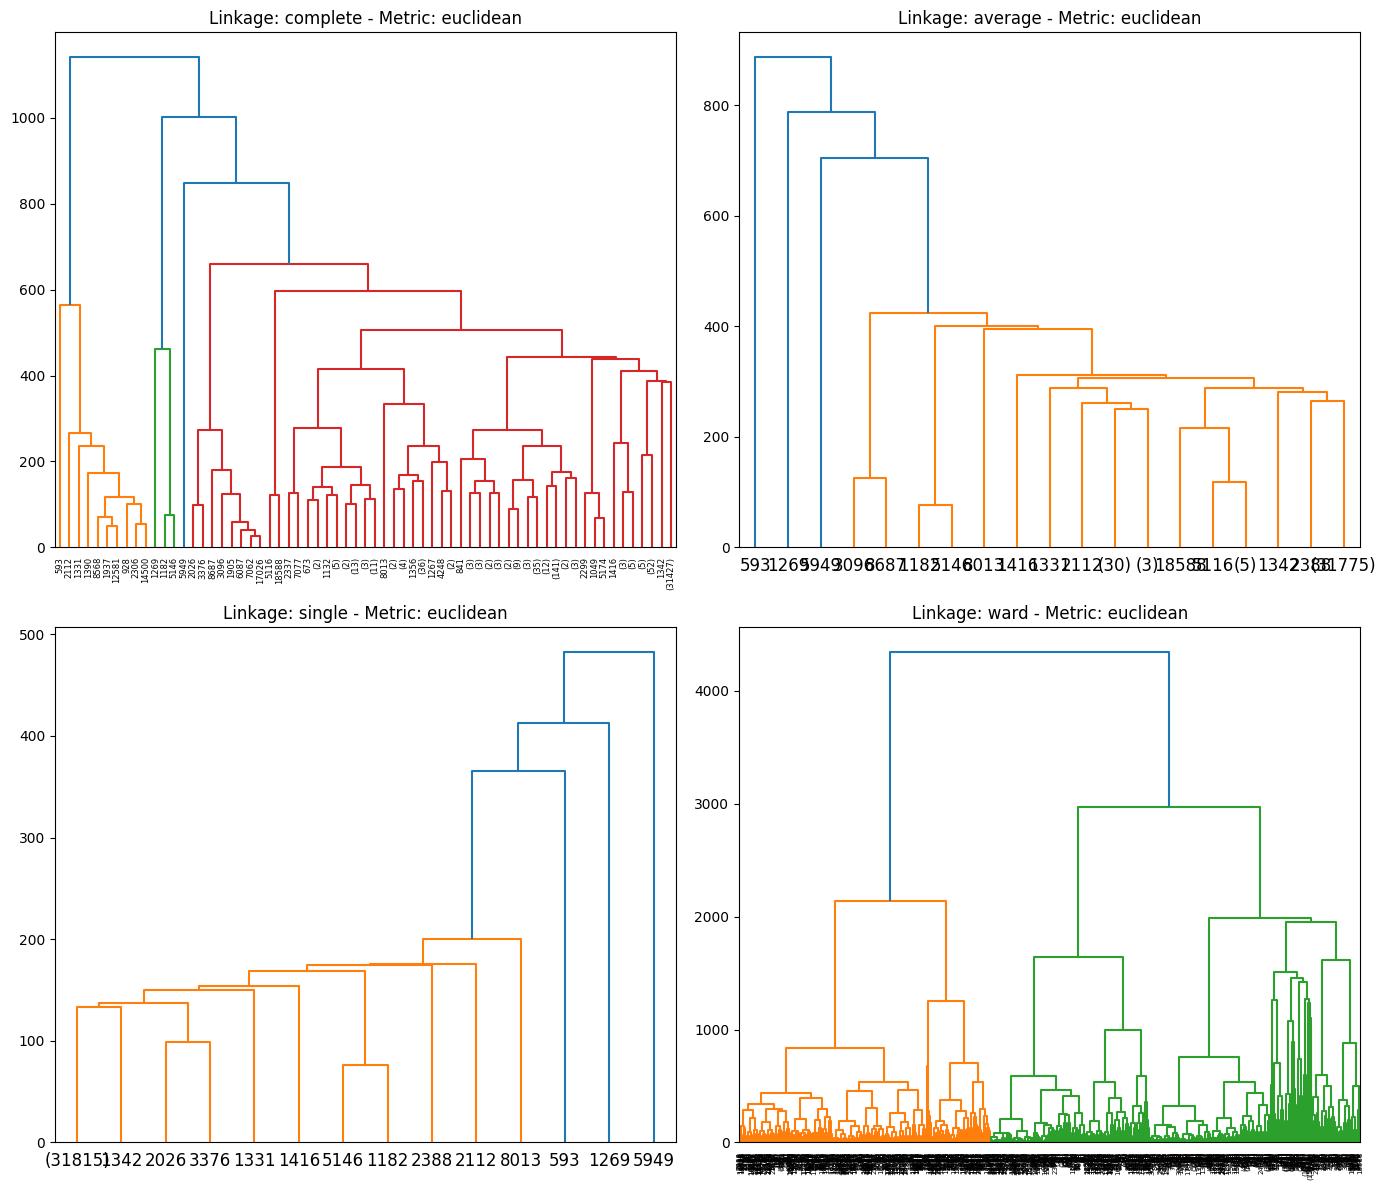

In [5]:
# f.plot_hierarchical_dendrograms(scaled_data, path=path+'euclidean', linkages=linkages, metrics=['euclidean'])

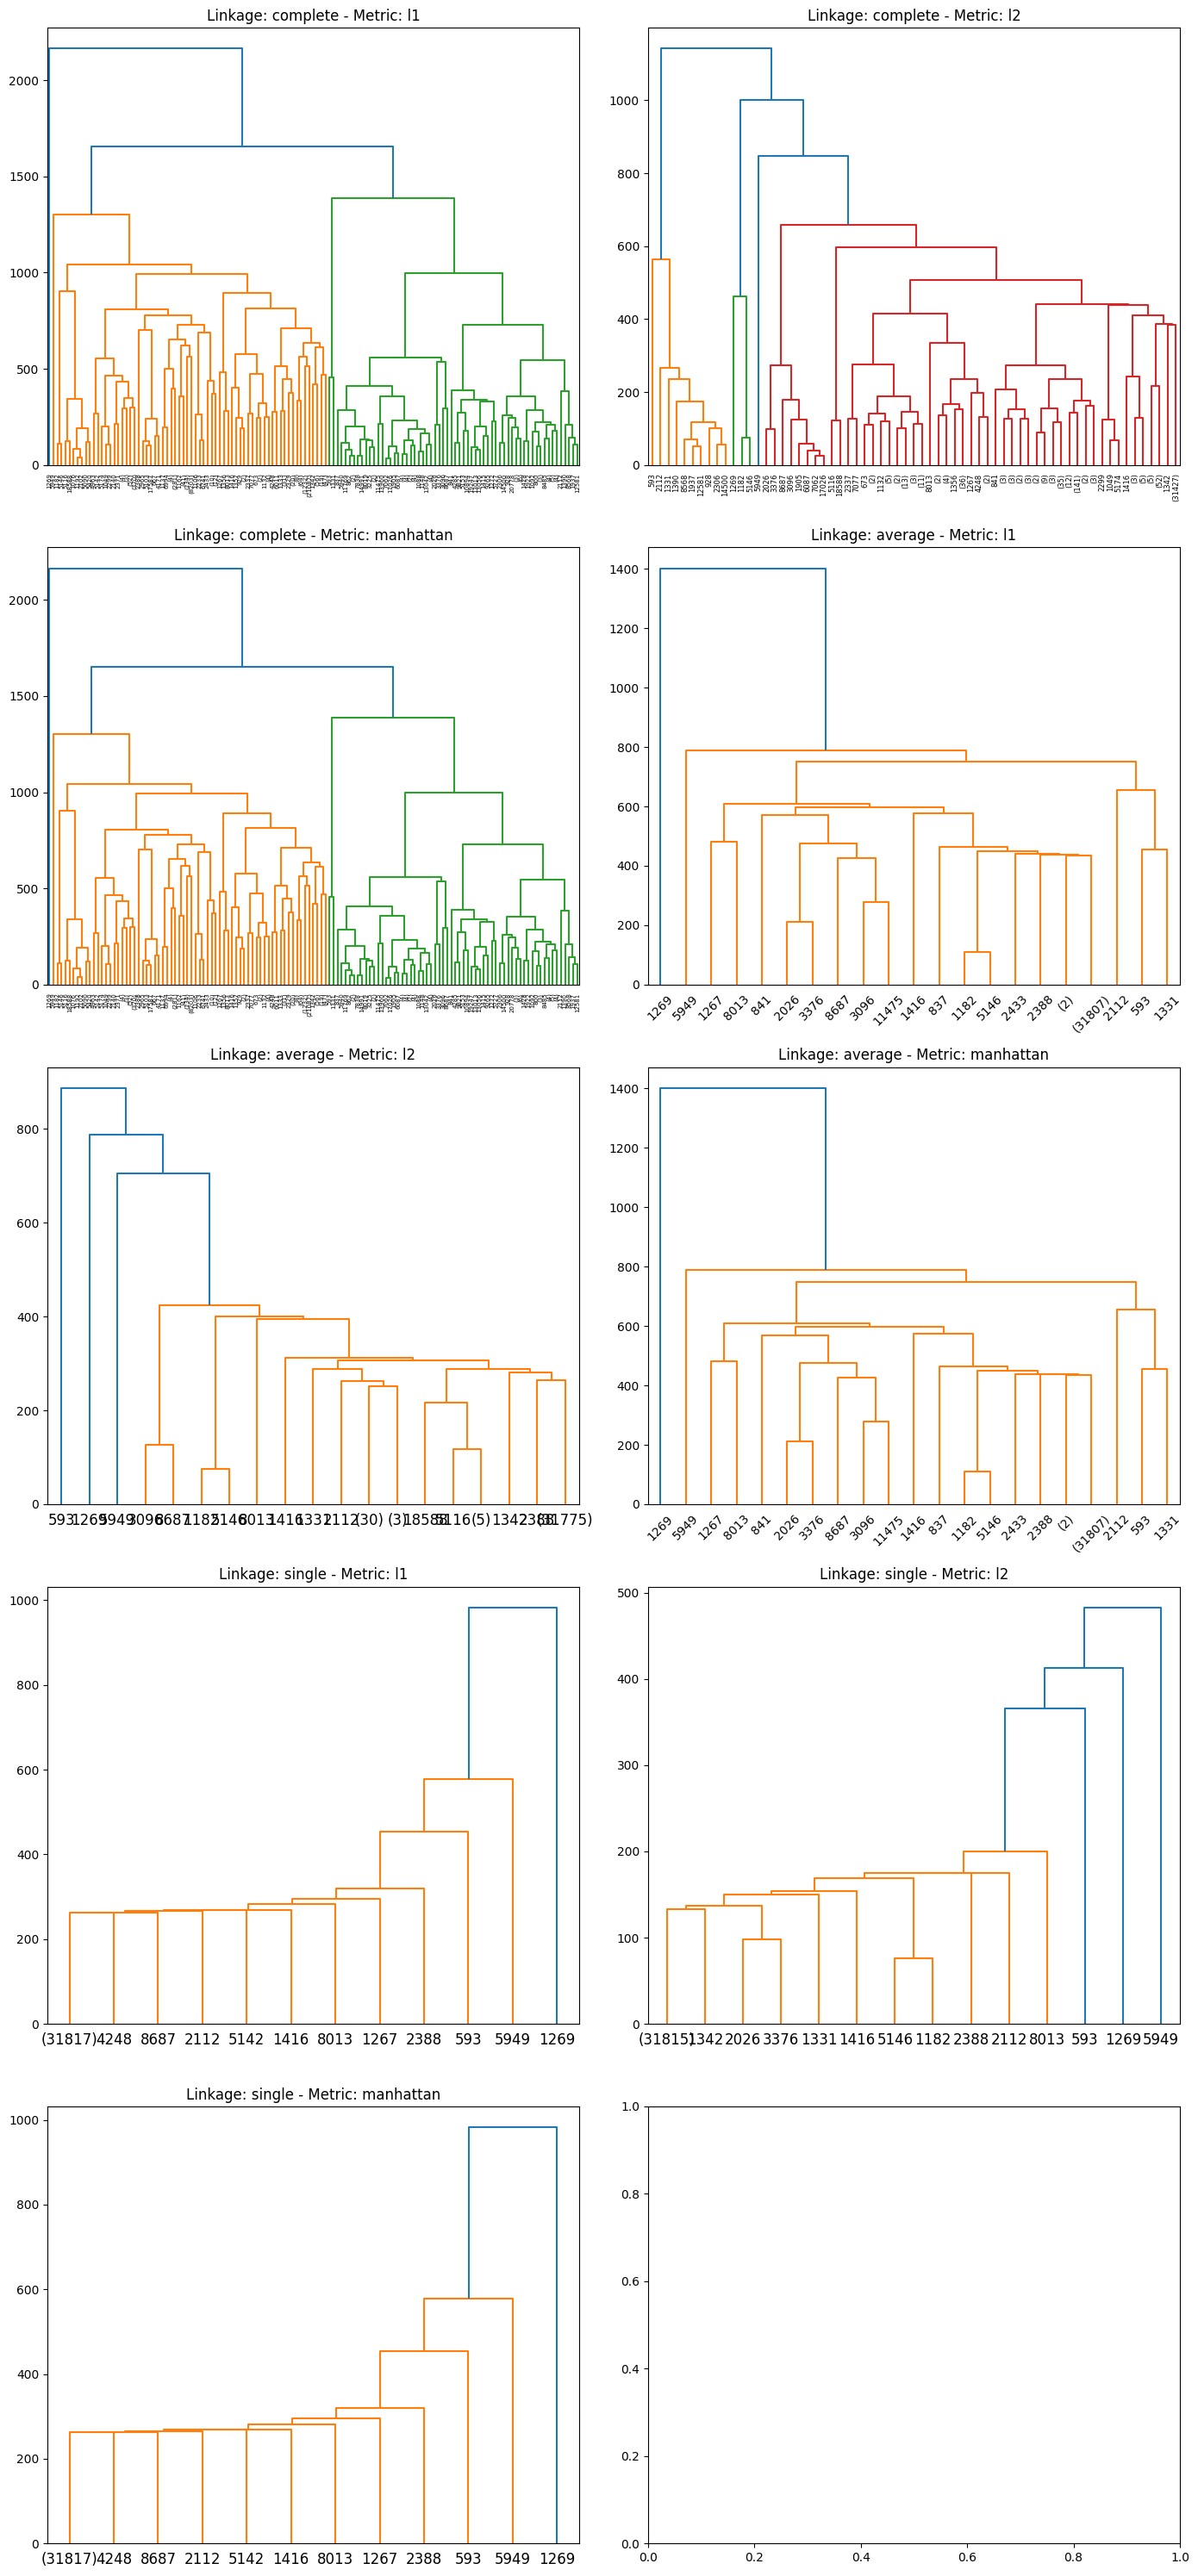

In [6]:
# f.plot_hierarchical_dendrograms(scaled_data, path=path+'others', linkages=["complete", "average", "single"], metrics=['l1', 'l2', 'manhattan'])

In [7]:
hr_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'ward', "metric": 'euclidean'}
    for k in range(2, 9)  
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l2'}
    for k in range(2, 7)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'manhattan'}
    for k in range(2, 6) 
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    hr_results.append(result)

# Convert results to DataFrame
hr_results_df = pd.DataFrame(hr_results)
hr_results_df

,Model,n_clusters,linkage,metric,R2,Silhouette,Calinski-Harabasz
0,hierarchical,2,ward,euclidean,0.184319,0.585093,7191.701523
1,hierarchical,3,ward,euclidean,0.270576,0.493652,5902.663760
2,hierarchical,4,ward,euclidean,0.315165,0.484077,4881.851770
3,hierarchical,5,ward,euclidean,0.353829,0.145520,4356.396024
4,hierarchical,6,ward,euclidean,0.391131,0.173777,4088.424059
5,hierarchical,7,ward,euclidean,0.417362,0.178622,3799.070509
6,hierarchical,8,ward,euclidean,0.442734,0.183522,3611.460757
7,hierarchical,2,complete,l2,0.038119,0.906054,1261.253050
8,hierarchical,3,complete,l2,0.053920,0.906133,906.894308
9,hierarchical,4,complete,l2,0.063595,0.906174,720.436166


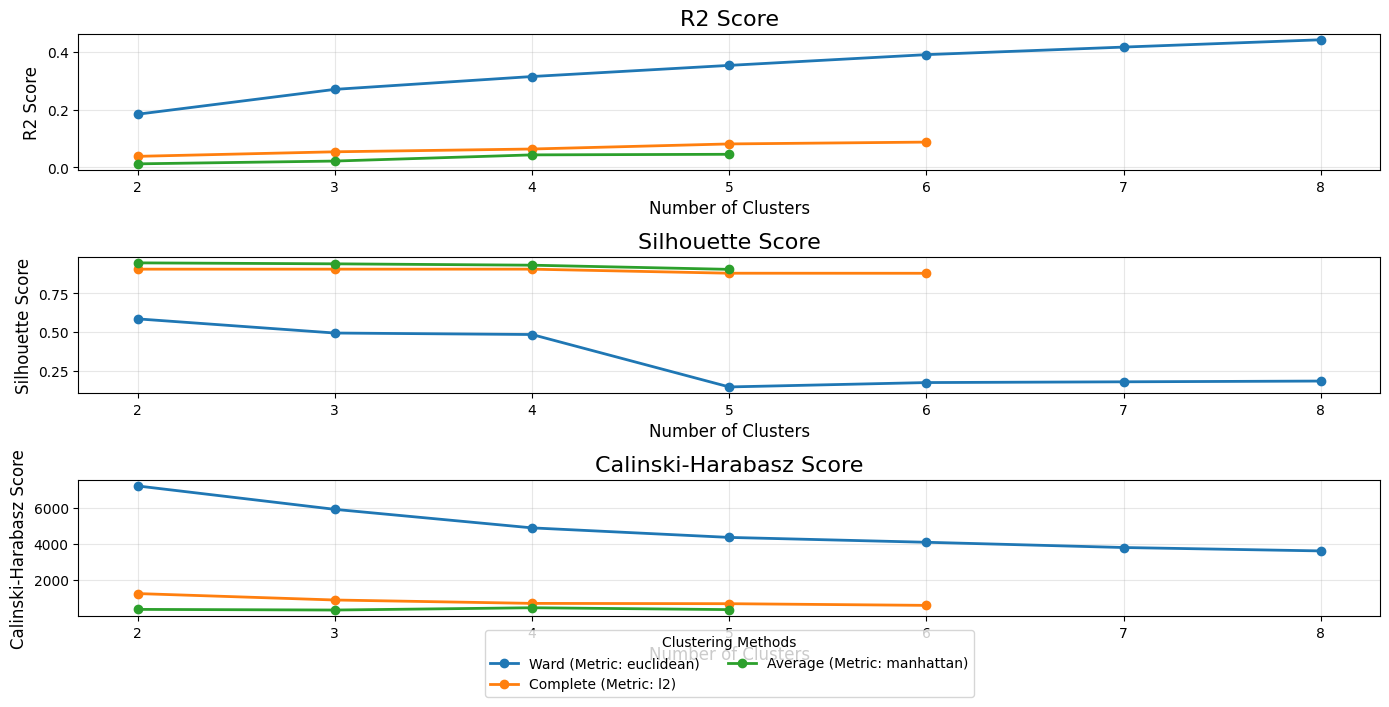

In [8]:
f.plot_evaluation_scores(hr_results_df, path)

**Final Model**

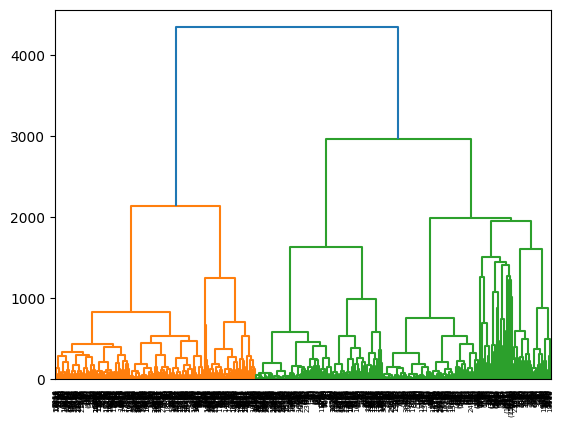

In [9]:
hc_model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage='ward', compute_distances=True).fit(scaled_data)
f.plot_dendrogram(hc_model, truncate_mode="level", p=10)

## 2.2 K-Means

**Elbow Method**

In [10]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30, init='k-means++').fit(scaled_data)
    dispersion.append(kmeans.inertia_)

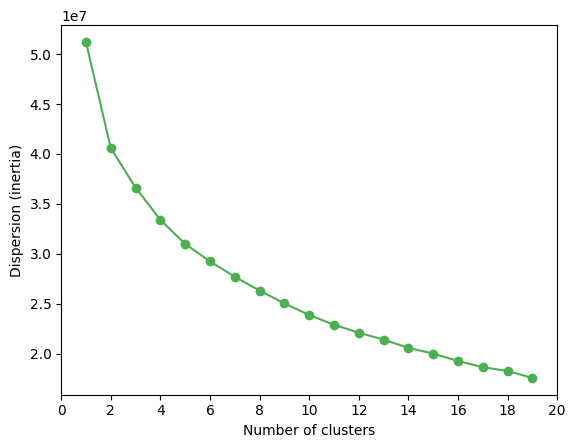

In [11]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
# plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [12]:
results_kmeans = []

# Define clustering settings
cluster_settings = [
    {"model_type": "kmeans", "n_clusters": k, 'random_state': 42, 'n_init': 20, 'init':'k-means++'} for k in range(4, 10)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    results_kmeans.append(result)

# Convert results to DataFrame
results_kmeans_df = pd.DataFrame(results_kmeans)
results_kmeans_df

,Model,n_clusters,random_state,n_init,init,R2,Silhouette,Calinski-Harabasz
0,kmeans,4,42,20,k-means++,0.348062,0.393792,5663.474813
1,kmeans,5,42,20,k-means++,0.395127,0.402747,5197.006794
2,kmeans,6,42,20,k-means++,0.429227,0.399154,4786.083367
3,kmeans,7,42,20,k-means++,0.459336,0.299335,4505.734994
4,kmeans,8,42,20,k-means++,0.486171,0.318310,4301.029384
5,kmeans,9,42,20,k-means++,0.511465,0.317618,4164.059249


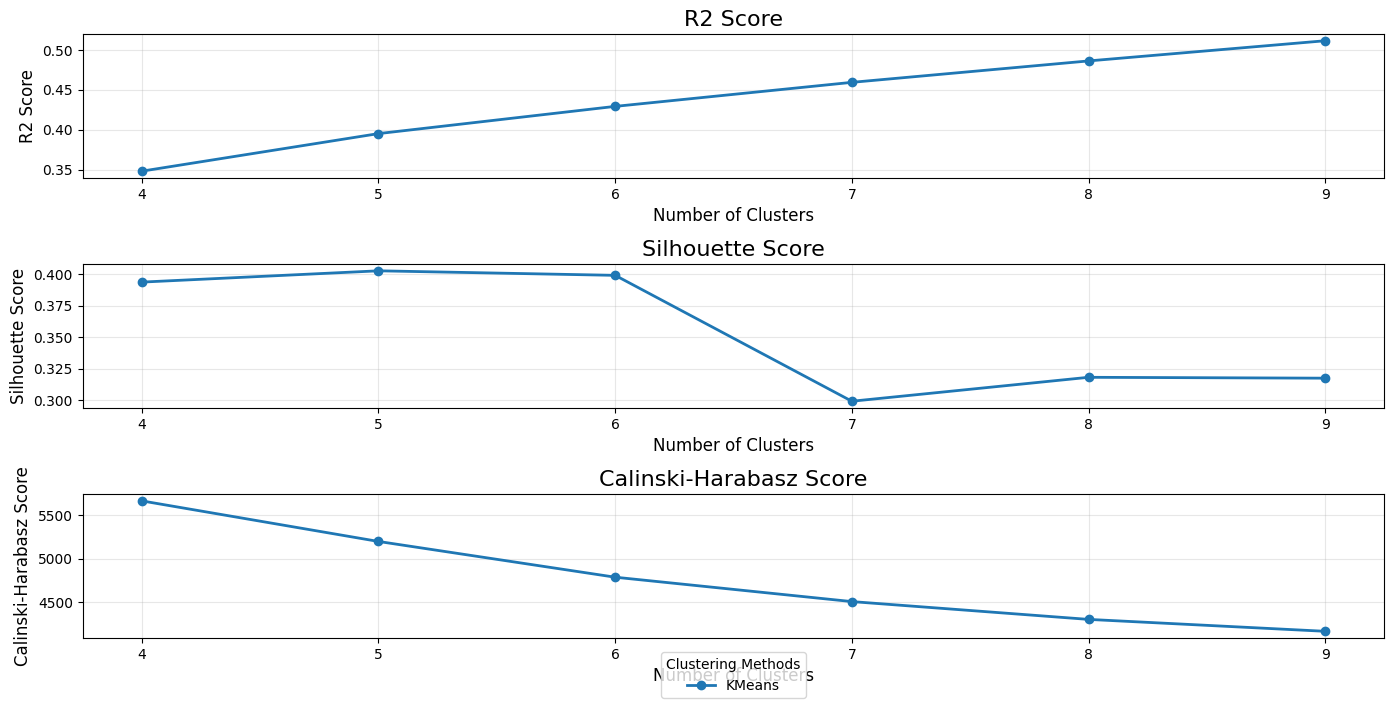

In [13]:
f.plot_evaluation_scores(results_kmeans_df, path)

**Final Model**

In [14]:
# For one solution of kmeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init=20, init='k-means++').fit(scaled_data)
scaled_data['kmeans'] = kmeans.labels_
r2_score = f.get_rsq(scaled_data, s.cuisine_preferences, 'kmeans') 
print("R-squared:", r2_score)

R-squared: 0.42922653747872447


## 2.3 Self-Organizing Maps (SOM)

## 2.4 Density Based Clustering

In [15]:
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

### 2.4.1 Mean Shift Clustering

In [16]:
bandwidth = estimate_bandwidth(scaled_data[s.cuisine_preferences], quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

np.float64(22.4432582450352)

In [17]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(scaled_data[s.cuisine_preferences])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 899


In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([scaled_data[s.cuisine_preferences], pd.Series(ms_labels, index=scaled_data.index, name="ms_labels")], axis=1)
df_concat.head()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,ms_labels
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0
5d272b9dcb,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
f6d1b2ba63,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
180c632ed8,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0
4eb37a6705,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,487


In [19]:
# Computing the R^2 of the cluster solution
r2 = f.get_rsq(df_concat, s.cuisine_preferences, 'ms_labels')
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.8263


### 2.4.2 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [20]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(scaled_data[s.cuisine_preferences])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 5


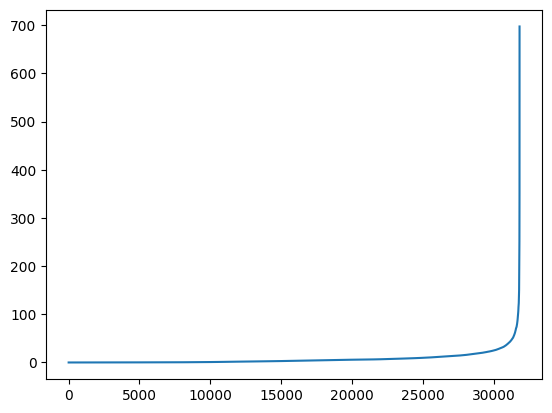

In [21]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(scaled_data[s.cuisine_preferences])
distances, _ = neigh.kneighbors(scaled_data[s.cuisine_preferences])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([scaled_data[s.cuisine_preferences], pd.Series(ms_labels, index=scaled_data.index, name="dbscan_labels")], axis=1)
df_concat.head()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,dbscan_labels
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0
5d272b9dcb,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
f6d1b2ba63,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
180c632ed8,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0
4eb37a6705,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,487


In [ ]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,dbscan_labels
customer_id,,,,,,,,,,,,,,,,


In [24]:
# Computing the R^2 of the cluster solution
r2 = f.get_rsq(df_concat, s.cuisine_preferences, 'dbscan_labels')
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.8263


### 2.4.3 Gaussian Mixture Model (GMM)

In [25]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(scaled_data[s.cuisine_preferences])
labels_proba = gmm.predict_proba(scaled_data[s.cuisine_preferences])

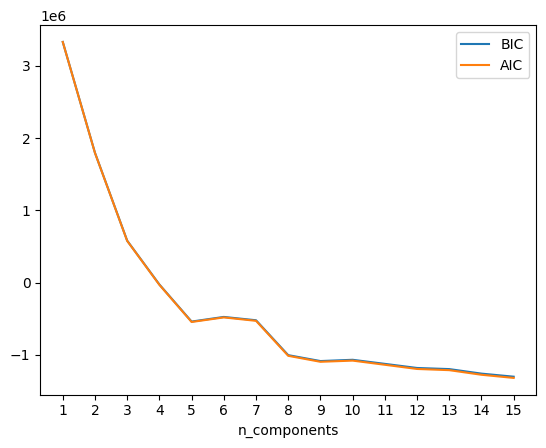

In [26]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(scaled_data[s.cuisine_preferences])
          for n in n_components]

bic_values = [m.bic(scaled_data[s.cuisine_preferences]) for m in models]
aic_values = [m.aic(scaled_data[s.cuisine_preferences]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([scaled_data[s.cuisine_preferences], pd.Series(gmm_labels, index=scaled_data.index, name="gmm_labels")], axis=1)
df_concat.head()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,gmm_labels
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,2
5d272b9dcb,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
f6d1b2ba63,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
180c632ed8,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,2
4eb37a6705,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:
# Computing the R^2 of the cluster solution
r2 = f.get_rsq(df_concat, s.cuisine_preferences, 'gmm_labels')
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0667


# Compare

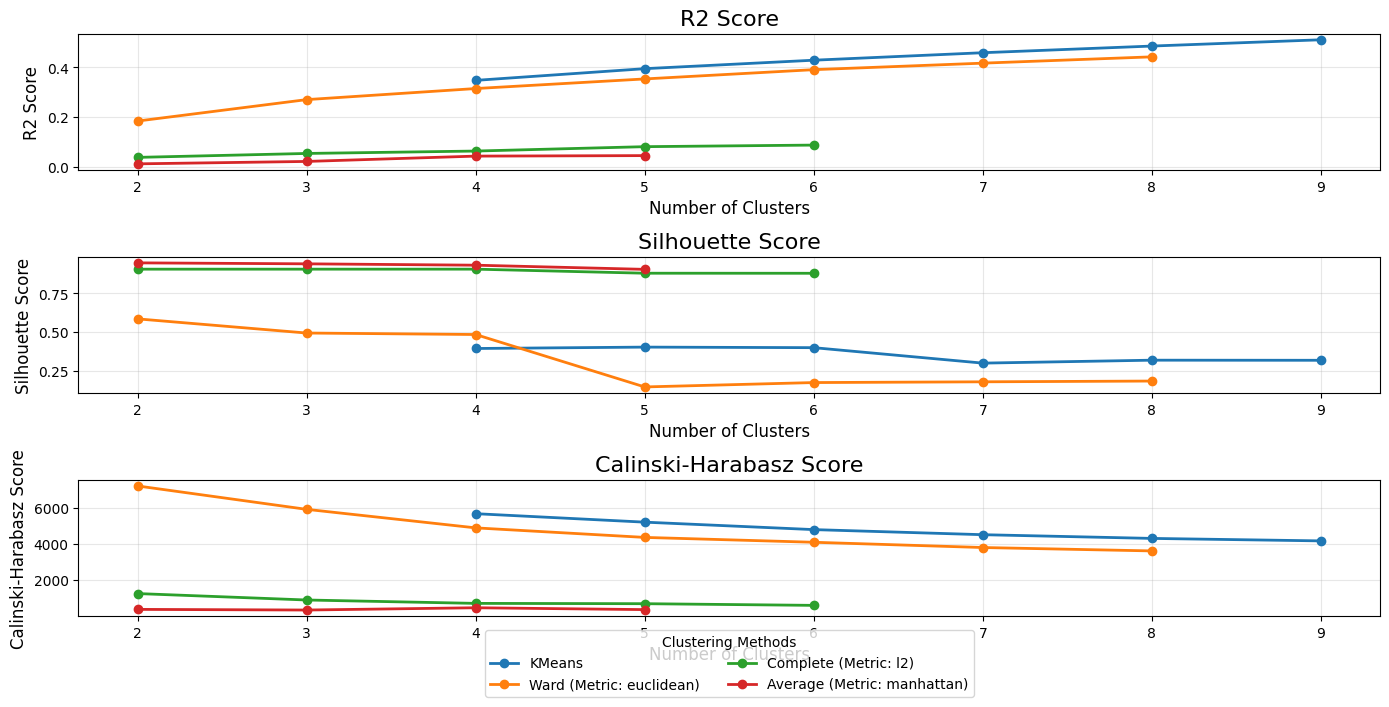

In [29]:
results_df = pd.concat([hr_results_df, results_kmeans_df], ignore_index=True, sort=False)
f.plot_evaluation_scores(results_df, path+'all')